In [1]:
!ls

Dockerfile  docker-compose.yaml  overrides.json
README.md   notebooks		 requirements.txt


In [128]:
import re

def get_song_notes(song):
    notes =[]
    return notes
def get_key_notes(key):
    notes = {}
    return notes

def get_song_key(song):
    return ''

def metric_notes_in_key_rate(song,key):
    notes = get_song_notes(song)
    key_notes = get_key_notes(key)
    
    total_notes = len(notes)

    notes_in_key = 0

    for current_note in notes:
        if current_note in key_notes:
            notes_in_key += 1
    if notes_in_key !=0:    
        rate = notes_in_key/total_notes
    else:
        rate = 0    
    return 0

def major_key(current_key):
    return True

def get_metrics(song):
    current_key = get_song_key(song)
    '''
    @article{Sturm2016c,
    author = {B. L. Sturm and O. Ben-Tal},
    journal = {J. Creative Music Systems},
    month = {Sep.},
    number = {1},
    title = {Taking the Models back to Music Practice: Evaluating Generative Transcription Models built using Deep Learning},
    volume = {2},
    year = {2017}}
    '''    
    keys_to_test = {
        'minor':['natural','harmonic','melodic'],
        'major':['major','dorian','mixolidian']
        }
    test_keys = keys_to_test['major'] if major_key(current_key) else keys_to_test['minor']
    metrics = {}
    for test_key in test_keys:
        metrics[test_key] = metric_notes_in_key_rate(song,test_key)
    return metrics


current_song = '''M:4/4L:1/4K:Am|"Am"|"Dm"|"E"|"E"|"Am"|"Dm"|"E"|"Am"|]
E|"Am"A3/2B/2A|"Am"e2e3/2d/2|"Dm"B3/2c/2A3/2B/2|"E"G/2E/2E3/2F/2G3/2B/2|"E"e3/2f/2e3/2d/2|"Am"B3/2c/2A3/2B/2|"Dm"c3/2d/2e3/2f/2|"E"e3/2d/2B3/2A/2|"Am"B3/2c/2A3/2B/2|"Dm"c/2d3/2e/2f3/2e/2|"E"e3/2d/2B3/2d/2|"Am"B/2A3/2c/2A3/2B/2|"Dm"c3/2d/2e3/2f/2|"E"e3/2d/2B3/2d/2|"Am"B3/2A/2A3/2B/2|"Dm"c3/2A/2B3/2c/2|"E"e3/2B/2e3/2d/2|"Am"B3/2c/2A3/2B/2|"D"c3/2d/2e3/2f/2|"E"e3/2d/2B3/2d/2|"Am"B/2A3/2A/2B3/2c/2|"D"d3/2A/2B3/2c/2|"E"B3/2A/2G3/2B/2|"Am"A3|]
'''
header, body = current_song.splitlines()
get_metrics(current_song)

{'major': 0, 'dorian': 0, 'mixolidian': 0}

In [13]:
current_song.splitlines()

['M:4/4L:1/4K:G|"I"|"IV"|"V"|"V"|"I"|"IV"|"V"|"I"|]',
 '"I"G/2A/2B/2A/2G/2F/2|G/2A/2B/2A/2G/2F/2|"IV"E3/4F/4G/2E/2|C/2C/2C/2|"V"B,2|"I"G/2A/4G/2F/2E/2|"IV"C/2C/2C/2D/2E/2|"V"F/2B,/2D/2C/2B,/2|"I"G/2G/2G/2A/2|"IV"G/2A/4G/4F/4G/2|"V"F/2G/2F/2D/2|"I"E2|]']

In [70]:
from music21 import *
abc_string = """
X:1
T:Example
M:4/4
L:1/4
K:G
"I"^G/2_A/2B/2A/2G/2F/2|G/2A/2B/2A/2G/2F/2|"IV"E3/4F/4G/2E/2|C/2C/2C/2|"V"B,2|"I"G/2A/4G/2F/2E/2|"IV"C/2C/2C/2D/2E/2|"V"F/2B,/2D/2C/2B,/2|"I"G/2G/2G/2A/2|"IV"G/2A/4G/4F/4G/2|"V"F/2G/2F/2D/2|"I"E2|]
"""
abc_score = converter.parse(abc_string, format='abc')
len(abc_score.pitches)

49

In [25]:
abcFormat.ABCFile.extractReferenceNumber(abc_string, 1)

'X:1\nT:Example\nM:4/4\nL:1/4\nK:C\nC D E F | G A B c |\n'

In [92]:
dict(zip(['M','L','K'],['1','2','3']))

{'M': '1', 'L': '2', 'K': '3'}

In [132]:
def format_model_output(abc_song_model_output):
    header_chars = ['M','L','K']
    pattern = re.compile(r'([{}])'.format(''.join(header_chars)))
    formatted_song = pattern.sub(r' \1', abc_song_model_output)
    print(formatted_song.split())
    header_M,header_L,aux_header_K,song_body= formatted_song.split()
    index = aux_header_K.find('|')
    header_K = aux_header_K[:index]
    header_comment = '%'+aux_header_K[index:]
    song_metadata = [header_M,header_L,header_K,header_comment,song_body]
    formatted_song = '\n'.join(song_metadata)
    return dict(zip(['M','L','K','chord_prog'],song_metadata)),formatted_song

def get_song_key_obj(song_metadata):
    song_key_metadata = abcFormat.ABCMetadata(song_metadata['K'])
    song_key_metadata.preParse()
    return song_key_metadata.getKeySignatureObject()

current_song_metadata, current_song_formatted = format_model_output(current_song)
abch = abcFormat.ABCHandler()
abch.tokenize(current_song_formatted)
print(current_song_formatted)
key_obj = get_song_key_obj(current_song_metadata)
[key_pitch.name for key_pitch in key_obj.pitches]

['M:4/4', 'L:1/4', 'K:Am|"Am"|"Dm"|"E"|"E"|"Am"|"Dm"|"E"|"Am"|]', 'E|"Am"A3/2B/2A|"Am"e2e3/2d/2|"Dm"B3/2c/2A3/2B/2|"E"G/2E/2E3/2F/2G3/2B/2|"E"e3/2f/2e3/2d/2|"Am"B3/2c/2A3/2B/2|"Dm"c3/2d/2e3/2f/2|"E"e3/2d/2B3/2A/2|"Am"B3/2c/2A3/2B/2|"Dm"c/2d3/2e/2f3/2e/2|"E"e3/2d/2B3/2d/2|"Am"B/2A3/2c/2A3/2B/2|"Dm"c3/2d/2e3/2f/2|"E"e3/2d/2B3/2d/2|"Am"B3/2A/2A3/2B/2|"Dm"c3/2A/2B3/2c/2|"E"e3/2B/2e3/2d/2|"Am"B3/2c/2A3/2B/2|"D"c3/2d/2e3/2f/2|"E"e3/2d/2B3/2d/2|"Am"B/2A3/2A/2B3/2c/2|"D"d3/2A/2B3/2c/2|"E"B3/2A/2G3/2B/2|"Am"A3|]']
M:4/4
L:1/4
K:Am
%|"Am"|"Dm"|"E"|"E"|"Am"|"Dm"|"E"|"Am"|]
E|"Am"A3/2B/2A|"Am"e2e3/2d/2|"Dm"B3/2c/2A3/2B/2|"E"G/2E/2E3/2F/2G3/2B/2|"E"e3/2f/2e3/2d/2|"Am"B3/2c/2A3/2B/2|"Dm"c3/2d/2e3/2f/2|"E"e3/2d/2B3/2A/2|"Am"B3/2c/2A3/2B/2|"Dm"c/2d3/2e/2f3/2e/2|"E"e3/2d/2B3/2d/2|"Am"B/2A3/2c/2A3/2B/2|"Dm"c3/2d/2e3/2f/2|"E"e3/2d/2B3/2d/2|"Am"B3/2A/2A3/2B/2|"Dm"c3/2A/2B3/2c/2|"E"e3/2B/2e3/2d/2|"Am"B3/2c/2A3/2B/2|"D"c3/2d/2e3/2f/2|"E"e3/2d/2B3/2d/2|"Am"B/2A3/2A/2B3/2c/2|"D"d3/2A/2B3/2c/2|"E"B3/2A/2G3/2B/

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'A']

['M:4/4', 'L:1/4', 'K:Am|"Am"|"Dm"|"E"|"E"|"Am"|"Dm"|"E"|"Am"|]', 'E|"Am"A3/2B/2A|"Am"e2e3/2d/2|"Dm"B3/2c/2A3/2B/2|"E"G/2E/2E3/2F/2G3/2B/2|"E"e3/2f/2e3/2d/2|"Am"B3/2c/2A3/2B/2|"Dm"c3/2d/2e3/2f/2|"E"e3/2d/2B3/2A/2|"Am"B3/2c/2A3/2B/2|"Dm"c/2d3/2e/2f3/2e/2|"E"e3/2d/2B3/2d/2|"Am"B/2A3/2c/2A3/2B/2|"Dm"c3/2d/2e3/2f/2|"E"e3/2d/2B3/2d/2|"Am"B3/2A/2A3/2B/2|"Dm"c3/2A/2B3/2c/2|"E"e3/2B/2e3/2d/2|"Am"B3/2c/2A3/2B/2|"D"c3/2d/2e3/2f/2|"E"e3/2d/2B3/2d/2|"Am"B/2A3/2A/2B3/2c/2|"D"d3/2A/2B3/2c/2|"E"B3/2A/2G3/2B/2|"Am"A3|]']
-------------------------
Key A minor
In Key:  160
Not in Key: 10
-------------------------


<music21.graph.plot.HistogramPitchClass for <music21.stream.Stream 0x7ff8e65d0910>>

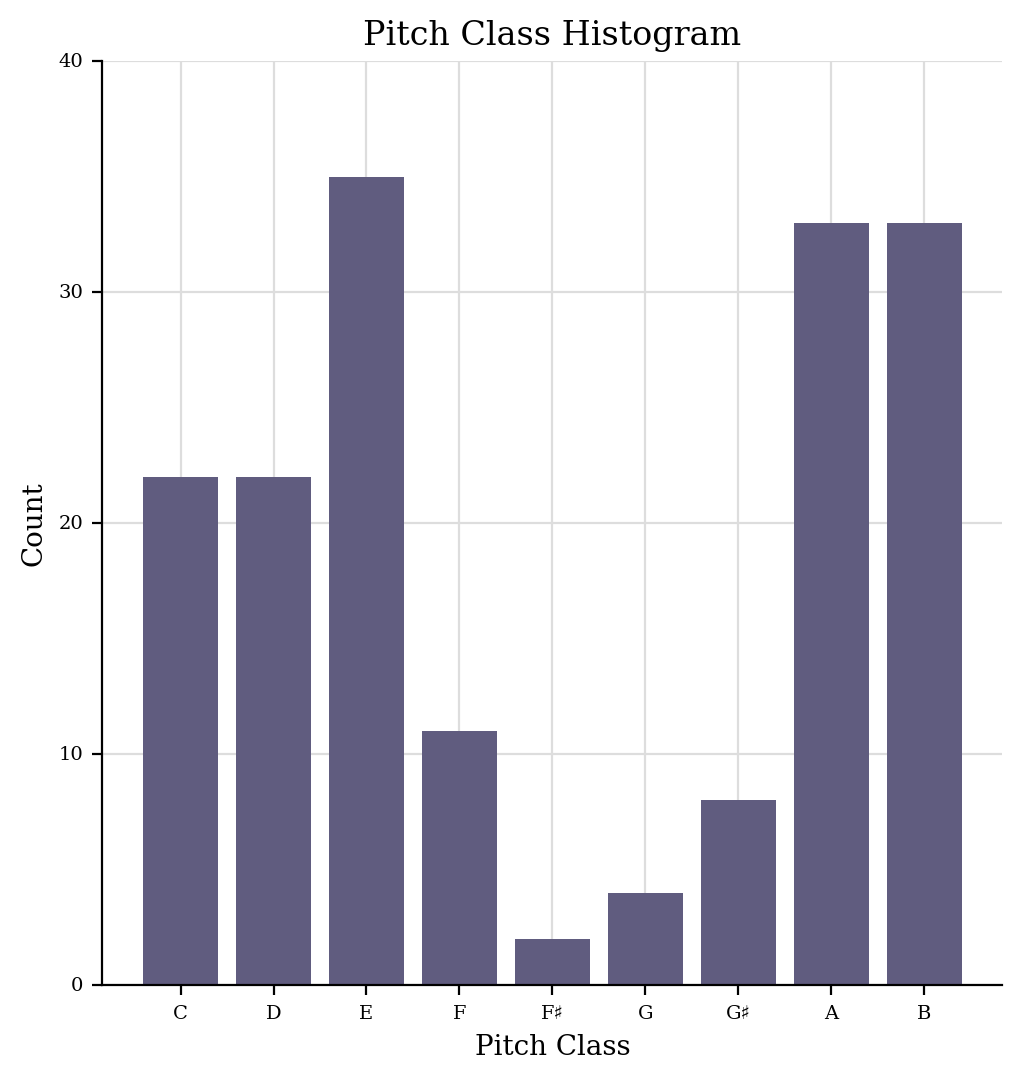

In [134]:
other_abc_string = """
X:1
T:Example
M:4/4
L:1/4
K:G
"G"G/2A/2B/2A/2G/2F/2|G/2A/2B/2A/2G/2F/2|"IV"E3/4F/4G/2E/2|C/2C/2C/2|"V"B,2|"I"G/2A/4G/2F/2E/2|"IV"C/2C/2C/2D/2E/2|"V"F/2B,/2D/2C/2B,/2|"I"G/2G/2G/2A/2|"IV"G/2A/4G/4F/4G/2|"V"F/2G/2F/2D/2|"I"E2|]
"""
current_song_metadata, current_song_formatted = format_model_output(current_song)
examples_stream = stream.Stream()
abc_scores = [current_song_formatted]
streams = []
for abc_song in abc_scores:
    print('-----'*5)
    parsed_abc_song = converter.parse(abc_song, format='abc')
    examples_stream.insert(examples_stream.highestTime, parsed_abc_song)
    current_key = parsed_abc_song.analyze('key')
    current_key_pitches = [key_pitch.name for key_pitch in current_key.pitches]
    current_pitches = parsed_abc_song.pitches
    count_pitches_in_key = 0
    count_pitches_not_in_key = 0
    for pitch in current_pitches:
        if pitch.name in current_key_pitches:
            count_pitches_in_key += 1
        else:
            count_pitches_not_in_key += 1
    print('Key',current_key.name)
    print('In Key: ', count_pitches_in_key)
    print('Not in Key:', count_pitches_not_in_key)
    print('-----'*5)
examples_stream.plot('histogram', 'pitchClass')

<music21.graph.plot.HistogramPitchSpace for <music21.stream.Stream 0x7ff8e8874d60>>

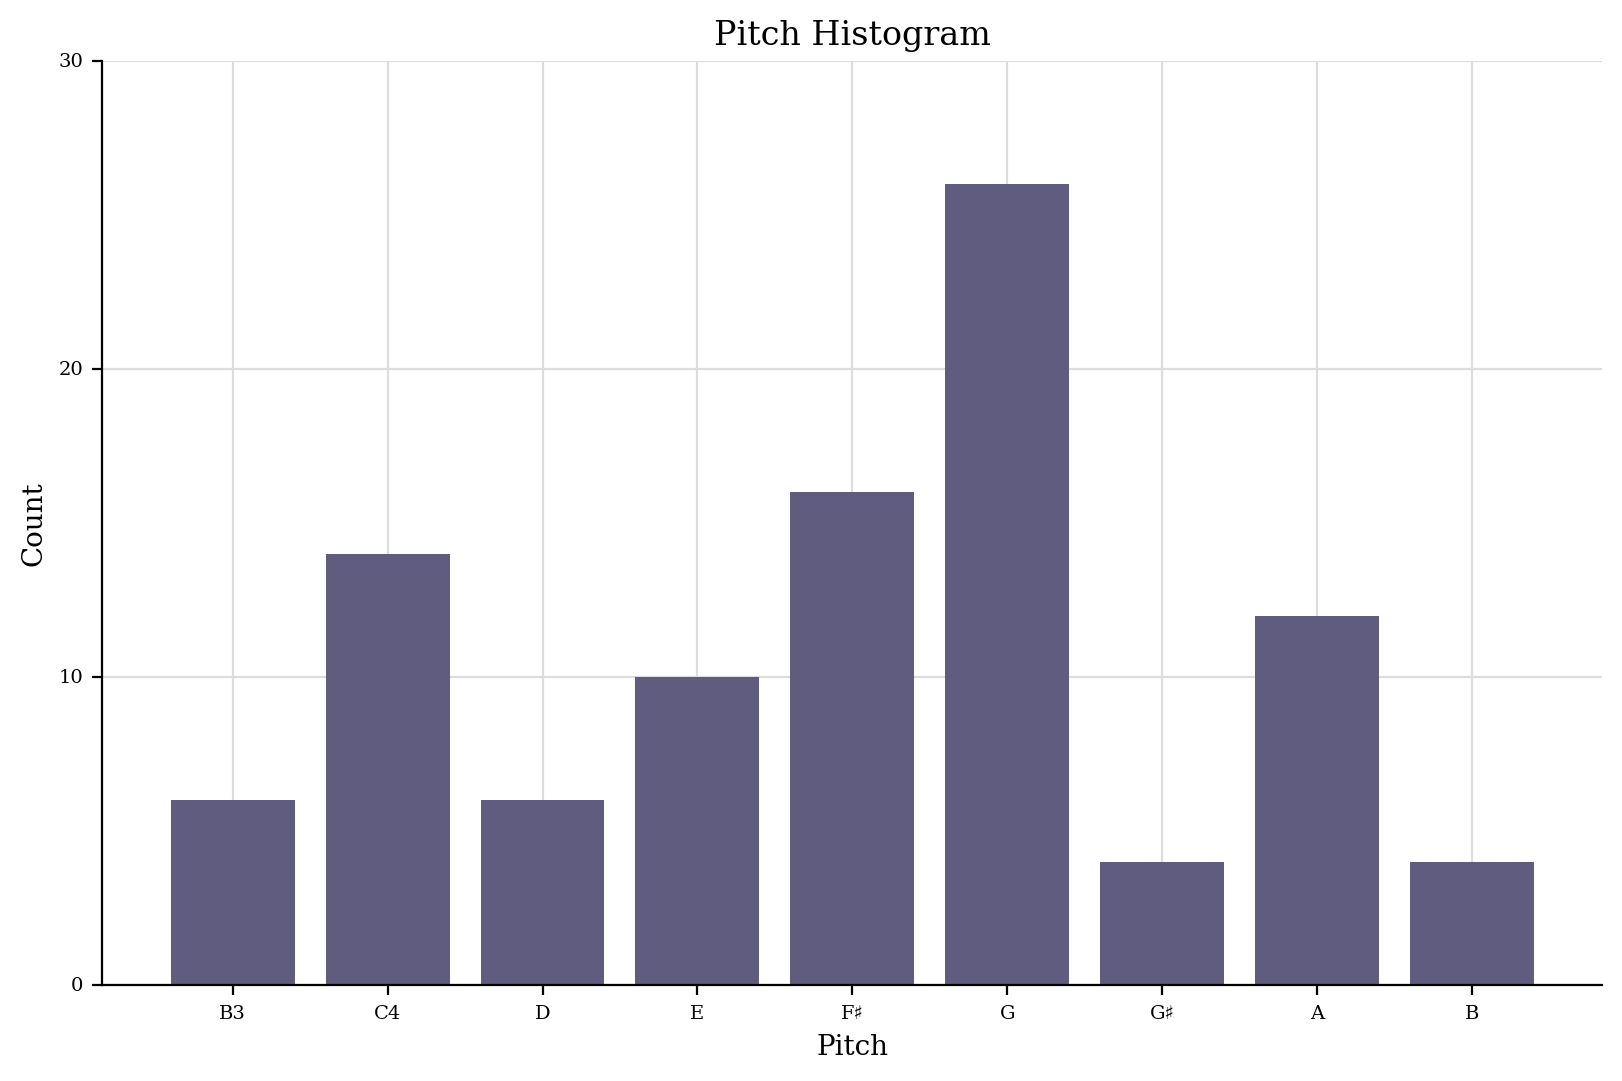

In [42]:
examples_stream.plot('histogram', 'pitch')

In [68]:
something =abcFormat.ABCMetadata(current_song).preParse()


In [73]:
A = ['M', 'K', 'L', '|']
B = "hello... (world)!"
pattern = re.compile(r'([{}])'.format(''.join(A)))
new_string = pattern.sub(r' \1', B)
new_string

'hello . . .  (world ) !'

In [188]:
import os

def get_subfolders_names(path):
    return [x[0] for x in os.walk(path)]

def get_files_with_prefix(path, prefix):
    return [each for each in os.listdir(path) if each.startswith(prefix)]

def read_files_in_directory(path, prefix):
    files = get_files_with_prefix(path, prefix)
    contents = []
    for file in files:
        with open(path+'/'+file, 'r') as f:
            content = f.read()
            contents.append(content)
    return dict(zip(files,contents))

    
experiments_main_path = './notebooks/nanoGPT/older_ckpt/'
experiments_paths = get_subfolders_names(experiments_main_path)[1:]    
experiments = {path.split('/')[-1]:path for path in experiments_paths}
experiments

{'hd-8-ly-12-embd-240': './notebooks/nanoGPT/older_ckpt/hd-8-ly-12-embd-240',
 'hd-8-ly-12-embd-280': './notebooks/nanoGPT/older_ckpt/hd-8-ly-12-embd-280',
 'hd-8-ly-12-embd-368': './notebooks/nanoGPT/older_ckpt/hd-8-ly-12-embd-368',
 'hd_8_ly_6_bch_84': './notebooks/nanoGPT/older_ckpt/hd_8_ly_6_bch_84',
 'hd-8-ly-12-embd-320': './notebooks/nanoGPT/older_ckpt/hd-8-ly-12-embd-320',
 'hd-8-ly-16-rn-data': './notebooks/nanoGPT/older_ckpt/hd-8-ly-16-rn-data',
 'hd-12-ly-12': './notebooks/nanoGPT/older_ckpt/hd-12-ly-12',
 'm_voices': './notebooks/nanoGPT/older_ckpt/m_voices',
 'hd-8-ly-12-bt-4': './notebooks/nanoGPT/older_ckpt/hd-8-ly-12-bt-4',
 'hd-8-ly-12-bt4-ovrf': './notebooks/nanoGPT/older_ckpt/hd-8-ly-12-bt4-ovrf',
 'hd-8-ly-16': './notebooks/nanoGPT/older_ckpt/hd-8-ly-16',
 't_data': './notebooks/nanoGPT/older_ckpt/t_data',
 'hd-8-ly-12-bt-8': './notebooks/nanoGPT/older_ckpt/hd-8-ly-12-bt-8',
 'hd-8-ly-12-bt-16': './notebooks/nanoGPT/older_ckpt/hd-8-ly-12-bt-16',
 'hd-8-ly-12-bt-1': 

In [189]:
example='''Overriding: out_dir = out-abc-char
Overriding: start = M:4/4L:1/4K:C|"I"|"IV"|"V"|"V"|"I"|"IV"|"V"|"I"|]
number of parameters: 28.34M
abc_roman_num_char
Loading meta from data/abc_roman_num_char/meta.pkl...
M:4/4L:1/4K:C|"I"|"IV"|"V"|"V"|"I"|"IV"|"V"|"I"|]
e/2|"I"g/2g/4a/4g/4a/4g/4e/4|"V"d/2d/2f/4d/4B/2|"I"c/2c/4c/4c/4e/4g/4|"IV"a/2a/2a/4g/4f/4e/4|"V"d/2d/2d/4d/4B/4d/4|"V"d/2d/4d/4d/4d/4d/4B/4|"I"c3/2|g/4f/4|"I"e/2e/2c/4e/4c/2b/4|"IV"a/2a/2a/4g/4f/4e/4|"V"d/2d/2d/2b/4c'/4|"I"c'/2c'/2b/4c'/4g/4e/2|"IV"a/2a/2a/4g/4f/4e/4|"V"d/2d/4d/4d/4B/2|"I"c3/2|]

M:4/4
L:1/4
K:C
|"I""IV"|"I"|"I""IV"|"I"|"V""IV"|"I"|"I""V"|"I""IV"|"I""IV"|"V""I"|"I""IV"|"I""ii"|"V""I"|]
(3G/2A/2B/2|"I"c/2e/2e/2e/2"IV"f/2e/2f/2g/2e/2|"I"e/2d/2c/2F/2A/2G/2E/2G/2|"I"c/2A/2B/2c/2e/2
---------------
M:4/4L:1/4K:C|"I"|"IV"|"V"|"V"|"I"|"IV"|"V"|"I"|]
c|"I"f/2g/2g/2f/2e/2d/2|"IV"c3/4d/4c/4B/2A/2|"V"G/2A/2B/2c/2d/2|"V"e/2g/2f/2e/2d/2|"I"cf/4g/4a/4f/2e/2d/2|"IV"c3/2d/2c/2|"V"d/2e/2d/2c/2B/2|G/2A/2B/2c/4e/2d/2|"I"c2|]

M:4/4
L:1/4
K:C
|"I"|"VII"|"VII"|"I"|"I"|"IV"|"I"|"VII"|"I"|"I"|"IV"|"VII"|"I"|"I"|"IV"|"VII"|"I"|]
e|"I"c'2g|"VII"d2e|"I"c'2a|"I"c'2a|"IV"g2a|"VII"b2b|"I"c'2a|"I"g3-|"I"g2b|"IV"g3/2a/2g|"VII"d2e|"I"c'2a|"I"c'2c'|"IV"a3/2a/2g|"VII"f2e|"I"c2e|"I"c'2c'|"IV"a3/2a/2g|"VII"f2A|"I"G2d|"I"c'2a|"IV"g3/2a/2g|"VII"f2e|"I"c2|]

M:4/4
L:1/4

---------------
M:4/4L:1/4K:C|"I"|"IV"|"V"|"V"|"I"|"IV"|"V"|"I"|]
c/4d/4|"I"e/2e/4e/4g/4f/4e/4d/4e/4|"IV"f/2f/2f/4e/4d/4e/4|"V"f/2f/2f/4f/4f/4e/4d/4|"I"c/2c/4c/4e/2a/4|"IV"a/2a/2a/4f/4e/4d/4e/4|"V"f/2f/4g/4a/4b/4c'/4b/4|"I"c'/2c'/2c'/2a/4b/4|"IV"a/2b/4c'/2b/4a/4f/4e/4|"V"f/2f/4f/4f/4f/4e/4d/4e/4|"I"c3/2|]

M:2/4
L:1/4
K:C
|"V"|"I"|"VI"|"ii"|"I"|"V"|"I"|"V"|"I"|"VI"|"ii"|"ii""V"|"I"|"I"|"IV"|"I"|"V"|"I"|"IV"|"I"|"VI"|"ii"|"V"|"I"|]
"V"c'__b|"I"c'c'c'd'c'|"VI"bd'-d'/2_d'c'|"ii"bbba|"I"gc'c'=_b|"V"c'2ba|"I"c'c'c'd'|"V"bd'_d'=d'd'|"I"c'c'c'b|"VI"bd'_d'_d'|"ii"e'c
---------------
M:4/4L:1/4K:C|"I"|"IV"|"V"|"V"|"I"|"IV"|"V"|"I"|]
GB|"I"e2e3/2f/2|"I"g2f3/2e/2|"IV"ff2e|"V"d2d3/2f/2|"V"df2f/2f/2|"V"a2g/2f/2|"I"e3/2f/2e3/2f/2|"I"g2e3/2f/2|"IV"agd|"V"df2e/2d/2|"V"cBcd|"I"eee|"I"g2e3/2f/2|"IV"agd|"V"d2d|"IV"c'b3/2a/2|"V"gfe|"I"c2|]

M:4/4
L:1/4
K:G
|"I"|"I"|"IV"|"I"|"V"|"I""V"|"I"|"I"|"I"|"II"|"V"|"I"|"IV"|"I"|"IV""I"|"V""I"|"I"|"V""I"|"V""I"|]
"I"G/2A/2B/2c/2d/2e/2f/2g/2a/2|b/2a/2g/2f/2e/2dB|"I"G/2A/2B/2c/2d/2e/2f/2g/2a/2|"IV"b/2a/2g/2f/2e/2d/2e/2f/2g/2a/2|"I"b/2a/2g/2f/2e/2dB|"V"A/2B/2c/2d/2c/2B/2A/2B/2c/2d/2|"I"g/2f/2e/2d/
---------------
M:4/4L:1/4K:C|"I"|"IV"|"V"|"V"|"I"|"IV"|"V"|"I"|]
"I"g2ge|gfg3/2g/2|"IV"bagf|"V"ef3/2g/2|fedc|"V"B2aa/2=a/2|"I"ggag|gfg3/2|"I"ge"IV"ff|"V"ef3|efd=f|"V"B4|bag=f|e=fgf|e4|"I"ge3/2e/2|gedc|"IV"agf3/2g/2|afdf|"V"ef3/2g/2fe|d4|"V"Bdc_e|"I"gege|ged=f|"I"c4|"IV"agf3/2g/2|agfc|agfc|A4|"V"Bdc=e|fd=f|"V"B4|bagf|"I"e4|ge=f_f|"IV"ecd3/2c/2|agfe|"V"d4|Bdc=f|ef=fd|"V"B2a2|"I"bge_f|"IV"ecc3/2c/2|"V"B2a2|"I"gedc|"I"c4-|c4|]

M:4/4
L:1/4
K:G
|"I"|"I"|"IV"|"V"|"I"|"I"|"I"|"IV"|"V"|"I""I"|"IV"|"V"|"I"|"I"|"II"|"II""II"|"V""I"|"I"|"I"|"IV"|"I"|"V"|"V"|"I""IV"|"V"
---------------
M:4/4L:1/4K:C|"I"|"IV"|"V"|"V"|"I"|"IV"|"V"|"I"|]
Ge|"I"ggg|c/2c/2c/2e/2gg|"IV"acfa|"V"g2-g/2^f/2d/2|"V"d/2f/2d/2d/2ed|"I"c4|"I"cged|"I"cgec|"I"c/2c/2c/2c/2e/2gg|"IV"a/2c/2c/2c/2d/2e/2f/2e/2d/2|"V"d/2f/2a/2b/2b/2b/2c'/2b/2a/2|"I"gcc2|"V"g/2g/2^f/2g/2^f/2e/2=d/2B/2e/2|"I"c/2c/2c/2c/2e/2gg|"II"f/2^e/2f/2g/2a/2c'/2a/2g/2f/2|"I"e/2g/2c/2c/2c/2eg|"V"daGGB|"I"c/2c/2c/2c/2e/2gg|"I"g/2c/2c/2c/2e/2gg|"IV"a/2c/2c/2c/2d/2e/2f/2e/2d/2|"V"d/2f/2a/2b/2b/2c'/2b/2a/2g/2f/2|"I"c3|]

M:4/4
L:1/4
K:G
|"I"|"I"|"I""vi"|"ii""V"|"I"|"I"|"I"|"I""V"|"I""vi"|"ii""V"|"I
---------------
M:4/4L:1/4K:C|"I"|"IV"|"V"|"V"|"I"|"IV"|"V"|"I"|]
"V"cd|"I"e3/2d/2ce|"I"gab3/2a/2|"IV"gfed|"V"defg|"V"f2f2|"I"c3/2d/2ce|"IV"fdd3/2d/2|"V"dcBg|"V"agfe|"I"d4-|"I"c2|]

M:4/4
L:1/4
K:G
|"V"|"I"|"V""I"|"V"|"V"|"I"|"V"|"V"|"I""I"|"I""I"|"IV"|"IV"|"V"|"ii""V"|"I"|"I""V"|"I"|"I"|"V"|"V"|"I""V"|"I"|"I""V"|"I"|"I"|"IV"|"ii"|"V"|"I""V"|"I"|]
"V"GA|"I"Bd/2d/2dd|"V"Ac/2c/2ce|"I"dg/2g/2gg|"V"GA"I"BG|"V"GA/2c/2ce|"V"Ac/2c/2ce|"I"dg"I"gf|"I"g/2g/2g"I"dB|"IV"ef/2e/2dcd|"ii"e3"V"d/2e/2|"I"dd"V"de|"I"g/2a/2g"V"ag|"I"g3|A|"I"B2BG|"V"A2FD|"V"F2de|"I"dd/2d/2"V"dc|
---------------
M:4/4L:1/4K:C|"I"|"IV"|"V"|"V"|"I"|"IV"|"V"|"I"|]
(3G/2A/2_G/2|"I"_G/2d/2G/2B/2G/2c/2d/2|e/2G/2d/2G/2d/2G/2f/2G/2|"IV"e/2c/2A/2c/2e/2d/2c/2A/2|"V"=G/2B/2d/2G/2d/2G/2f/2G/2_g/2f/2|"I"e/2G/2e/2G/2e/2G/2e/2G/2|e/2G/2d/2G/2d/2G/2f/2G/2|"IV"e/2c/2A/2c/2e/2d/2c/2A/2|"V"G/2^F/2G/2A/2BA|"I"GcG|]

M:4/4
L:1/4
K:C
|"I"|"I"|"ii""V"|"I"|"I"|"I""vi"|"ii""V"|"I"|"I"|"I""vi"|"ii""V"|"I"|"I""vi"|"ii""V"|"I"|"I""vi"|"ii""V"|"I""vi"|"ii""V"|"I"|]
G/2F/2|"I"E/2D/2C/2E/2GG/2A/2|"I"ccG/2A/2G/2F/2|"ii"A/2G/2A/2G/2"V"F/2D/2E/2F/2|"I"E/2D/2C/2E/2GG/2A/2|"I"cc"vi"d/2c
---------------
M:4/4L:1/4K:C|"I"|"IV"|"V"|"V"|"I"|"IV"|"V"|"I"|]
e|"I"gga|a/2^g/2a/2b/2c'/2b/2|"IV"c'ca|a/2a/2a/2g/2f/2|"V"d/2e/2f/2d/2c/2d/2|"V"e/2^d/2e/2f/2-f/2|a/2^g/2a/2b/2c'/2b/2|"I"gga|"IV"a/2^g/2a/2b/2c'/2a/2|"V"g/2g/2g/2g/2a/2b/2c'/2|"I"c'c'c'g|"IV"a/2^g/2a/2b/2c'/2b/2a/2|"V"g/2g/2e/2dc/2d/2|"I"e/2^d/2e/2f/2-f/2g/2f/2|"IV"a/2a/2a/2c'/2a/2c'/2a/2|"V"g/2e/2g/2b/2c'/2b/2a/2|"I"g/2g/2g/2g/2c|]

M:4/4
L:1/4
K:Db
|"I"|"I"|"I"|"IV""I"|"ii""V"|"I"|"I"|"I"|"IV""I"|"V""I"|"I"|"IV""V"|"I"|"IV""I"|"V""I"|]
a|"I"def/2d/2f/2e/2d/2|"I"dfa3/2b/2|"IV"ag"I"a2|"ii"ba"V
---------------
M:4/4L:1/4K:C|"I"|"IV"|"V"|"V"|"I"|"IV"|"V"|"I"|]
e/2|"I"gce/2|g/2a/2g/2f/2|e/2c/2G/2B/2|"IV"d/2e/2g3/2f/2|"V"e/2d/2c/2d/2e/2|"V"f/2d/2c/2B/2d/2|"I"g/2c/2G/2B/2c/2|"IV"d/2e/2g3/2f/2|"V"e/2d/2c/2d/2e/2|"I"gcc/2d/2|"V"e/2d/2c/2d/2e/2f/2g/2|"I"ac3/2d/2|"IV"f/2e/2d/2e/2f/2g/2|a/2g/2f/2e/2d/2|"V"c/2d/2e/2f/2a/2g/2|"I"acc/2d/2|"IV"f/2e/2d/2e/2f/2g/2f/2|"V"e/2d/2c/2B/2A/2G/2|"I"ccB/2c/2|"IV"d/2e/2g/2f/2g/2f/2e/2|"V"d/2c/2d/2e/2f/2g/2|"I"acc|"I"c'/2b/2a/2c/2g/2c/2|"IV"f/2e/2d/2e/2f/2g/2|"V"abb/2c'/2|"IV"d'/2c'/2b/2c'/2b/2a/2|"V"g/2f/2g/2a/2b/2g/2|"I"a
---------------

'''

In [245]:
def get_songs_from_sample(sample):
    sample_split = '---------------\n'
    current_songs= sample.split(sample_split)[:-1]
    ignore_lines =5
    current_song = ''
    initial_song = '\n'.join(current_songs[0].splitlines()[5:7])
    remaining_songs = current_songs[1:]
    remaining_songs = ['\n'.join(sample_song.splitlines()[:2]) for sample_song in remaining_songs]
    song_samples = [initial_song]+remaining_songs
    print('num. song samples:',len(song_samples))
    return song_samples

get_songs_from_sample(example)

num. song samples: 10


['M:4/4L:1/4K:C|"I"|"IV"|"V"|"V"|"I"|"IV"|"V"|"I"|]\ne/2|"I"g/2g/4a/4g/4a/4g/4e/4|"V"d/2d/2f/4d/4B/2|"I"c/2c/4c/4c/4e/4g/4|"IV"a/2a/2a/4g/4f/4e/4|"V"d/2d/2d/4d/4B/4d/4|"V"d/2d/4d/4d/4d/4d/4B/4|"I"c3/2|g/4f/4|"I"e/2e/2c/4e/4c/2b/4|"IV"a/2a/2a/4g/4f/4e/4|"V"d/2d/2d/2b/4c\'/4|"I"c\'/2c\'/2b/4c\'/4g/4e/2|"IV"a/2a/2a/4g/4f/4e/4|"V"d/2d/4d/4d/4B/2|"I"c3/2|]',
 'M:4/4L:1/4K:C|"I"|"IV"|"V"|"V"|"I"|"IV"|"V"|"I"|]\nc|"I"f/2g/2g/2f/2e/2d/2|"IV"c3/4d/4c/4B/2A/2|"V"G/2A/2B/2c/2d/2|"V"e/2g/2f/2e/2d/2|"I"cf/4g/4a/4f/2e/2d/2|"IV"c3/2d/2c/2|"V"d/2e/2d/2c/2B/2|G/2A/2B/2c/4e/2d/2|"I"c2|]',
 'M:4/4L:1/4K:C|"I"|"IV"|"V"|"V"|"I"|"IV"|"V"|"I"|]\nc/4d/4|"I"e/2e/4e/4g/4f/4e/4d/4e/4|"IV"f/2f/2f/4e/4d/4e/4|"V"f/2f/2f/4f/4f/4e/4d/4|"I"c/2c/4c/4e/2a/4|"IV"a/2a/2a/4f/4e/4d/4e/4|"V"f/2f/4g/4a/4b/4c\'/4b/4|"I"c\'/2c\'/2c\'/2a/4b/4|"IV"a/2b/4c\'/2b/4a/4f/4e/4|"V"f/2f/4f/4f/4f/4e/4d/4e/4|"I"c3/2|]',
 'M:4/4L:1/4K:C|"I"|"IV"|"V"|"V"|"I"|"IV"|"V"|"I"|]\nGB|"I"e2e3/2f/2|"I"g2f3/2e/2|"IV"ff2e|"V"d2d3/2f/2|"V"df2f/2f/2|"V"a

In [246]:
for experiment_name,experiment_path in experiments.items():
    experiment_samples = read_files_in_directory(experiment_path,'examples')
    print(experiment_name)
    for sample_name in experiment_samples.keys():
        experiment_example = experiment_examples[sample_name]
        print(sample_name)
        sample_songs = get_songs_from_sample(experiment_example)
    print('-----'*10)

hd-8-ly-12-embd-240
examples_C.txt
num. song samples: 10
examples_G.txt
num. song samples: 10
examples_Am.txt
num. song samples: 10
--------------------------------------------------
hd-8-ly-12-embd-280
examples_C.txt
num. song samples: 10
examples_G.txt
num. song samples: 10
examples_Am.txt
num. song samples: 10
--------------------------------------------------
hd-8-ly-12-embd-368
examples_C.txt
num. song samples: 10
examples_G.txt
num. song samples: 10
examples_Am.txt
num. song samples: 10
--------------------------------------------------
hd_8_ly_6_bch_84
examples_C.txt
num. song samples: 10
examples_G.txt
num. song samples: 10
examples_Am.txt
num. song samples: 10
--------------------------------------------------
hd-8-ly-12-embd-320
examples_C.txt
num. song samples: 10
examples_G.txt
num. song samples: 10
examples_Am.txt
num. song samples: 10
--------------------------------------------------
hd-8-ly-16-rn-data
examples_C.txt
num. song samples: 10
examples_G.txt
num. song samples